# Gan

In [6]:
from models.ganso import GAN
import os
import matplotlib.pyplot as plt


from utils.loaders import load_safari

import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train) = load_safari("camel")

(80000, 28, 28, 1)


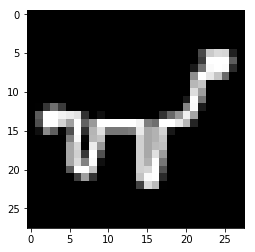

In [8]:
print(x_train.shape)
plt.imshow(x_train[200,:,:,0], cmap = 'gray')



In [9]:
gan = GAN()
gan._build_discriminator()
# gan.descrimator_model.summary()
gan._build_generator()
# gan.generator_model.summary()

gan._build_adversarial()

In [10]:
gan.train(x_train=x_train,epochs=100)


c:\GenIA\GDL_code\generative\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.706)(R 0.671, F 0.741)] [D acc: (0.367)(0.734, 0.000)] [G loss: 0.543] [G acc: 1.000]
IMAGES-saved 0


c:\GenIA\GDL_code\generative\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (0.925)(R 0.454, F 1.396)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.322] [G acc: 1.000]
IMAGES-saved 1
2 [D loss: (2.558)(R 0.140, F 4.977)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.624] [G acc: 0.891]
IMAGES-saved 2
3 [D loss: (0.703)(R 0.569, F 0.837)] [D acc: (0.484)(0.969, 0.000)] [G loss: 0.709] [G acc: 0.359]
IMAGES-saved 3
4 [D loss: (0.693)(R 0.680, F 0.705)] [D acc: (0.508)(0.656, 0.359)] [G loss: 0.543] [G acc: 1.000]
IMAGES-saved 4
5 [D loss: (0.508)(R 0.528, F 0.488)] [D acc: (1.000)(1.000, 1.000)] [G loss: 0.344] [G acc: 1.000]
IMAGES-saved 5
6 [D loss: (1.412)(R 0.278, F 2.546)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.460] [G acc: 1.000]
IMAGES-saved 6
7 [D loss: (0.696)(R 0.510, F 0.883)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.633] [G acc: 1.000]
IMAGES-saved 7
8 [D loss: (0.698)(R 0.643, F 0.754)] [D acc: (0.484)(0.953, 0.016)] [G loss: 0.678] [G acc: 0.734]
IMAGES-saved 8
9 [D loss: (0.682)(R 0.651, F 0.712)] [D acc: (0.570)(0.859, 0.281)] [G loss: 0.

In [11]:

gan.discriminator_model.summary()
gan.generator_model.summary()
gan.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 7, 7, 64)          102464    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 7, 64)          0         
__________

c:\GenIA\GDL_code\generative\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models  # Import layers and models from tensorflow.keras

# Define Model A
model_a = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])
model_a.summary()

# Define Model B using some layers from Model A and additional layers

model_a.trainable = False
model_b = models.Sequential([
    model_a.layers[0],  # Reuse the first layer from Model A
    layers.Dense(32, activation='relu'),  # Additional layer in Model B
    layers.Dense(10, activation='softmax')  # New output layer in Model B
])
model_b.summary()

model_a.trainable = True

# Print weights of the first layer in both models
print("Weights of the first layer in Model A:")
print(id(model_a.layers[0].get_weights()[0][0][0]))  # Print the ID of the weights array
print(model_a.layers[0].get_weights()[0][0][0])  # Print the weight of the first neuron in the first layer

print("\n")

print("Weights of the first layer in Model B:")
print(id(model_b.layers[0].get_weights()[0][0][0]))  # Print the ID of the weights array
print(model_b.layers[0].get_weights()[0][0][0])  # Print the weight of the first neuron in the first layer

# Modify the weight of the first neuron in the first layer of Model A
weights_a = model_a.layers[0].get_weights()  # Get the weights of the first layer in Model A
weights_a[0][0][0] = 0.77  # Modify the weight of the first neuron
model_a.layers[0].set_weights(weights_a)  # Set the modified weights back to the first layer in Model A

# Verify that the weight is modified in Model A
print(model_a.layers[0].get_weights()[0][0][0])  # Print the modified weight in Model A

# Verify that the weight is not modified in Model B
print(model_b.layers[0].get_weights()[0][0][0])  # Print the weight in Model B (should remain unchanged)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 52,650
Train